In [1]:
from preparing_script import data_processing_agrochem
import pandas as pd 
import numpy as np 
%load_ext autoreload
%autoreload 2

подготовка данных из того что уже предобработанно

In [2]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия_правленная_1.csv', sep = ';') #важно сомтреть чтобы была правленная агрохимия
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)

agrochem_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина', 'повторность',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1',
       'Общий азот, %', 'Органический углерод, %']

# общий датафрейм
agrochemistry_main = agrochemistry_total[agrochemistry_total['Глубина'].isin(['0-10',"10-20","20-30"])][agrochem_columns] #можно будет добавить глубины 20-30
agrochemistry_main['GPS №'] = agrochemistry_main['GPS №'].astype(int)
agrochemistry_main.drop('повторность', axis = 1, inplace= True)
agrochemistry_main.dropna(axis = 0, inplace= True)

# разбивка по точкам на ПП
pp_points = [525,526,527,528,586,529, 584,585]
by_points = agrochemistry_main[agrochemistry_main["GPS №"].isin(pp_points)]

## pH солевой вытяжки

### По обработкам

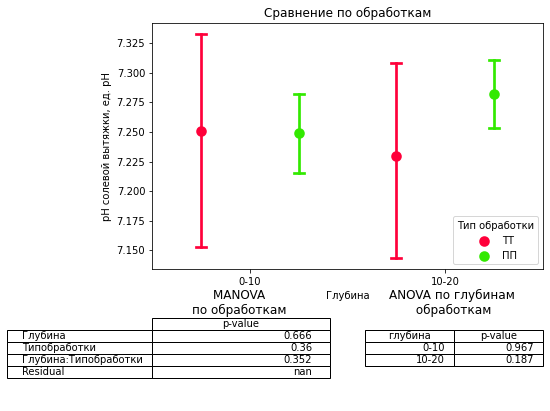

In [12]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН солевой вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/pH_сол_обработки.jpg')



In [13]:
stats

рН солевой вытяжки, ед. рН                    
                                            mean variation       std
Тип обработки Глубина                                               
ПП            0-10                      7.248788  0.014307  0.105320
              10-20                     7.281818  0.011611  0.085858
ТТ            0-10                      7.250556  0.026915  0.200806
              10-20                     7.229524  0.026779  0.198380

### По формам рельефа

## pH водной вытяжки
### По обработкам

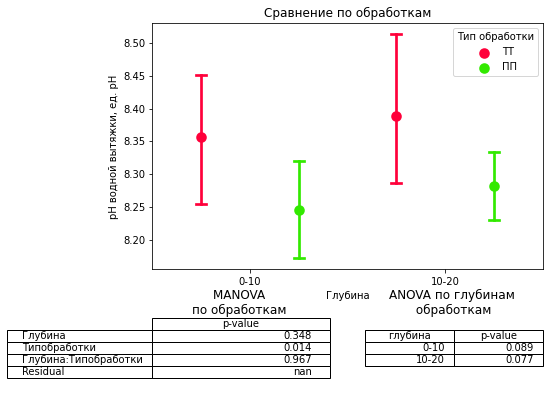

In [14]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/pH_вод_обработки.jpg')


In [15]:
stats

рН водной вытяжки, ед. рН                    
                                           mean variation       std
Тип обработки Глубина                                              
ПП            0-10                     8.245758  0.025599  0.214360
              10-20                    8.282727  0.019099  0.160649
ТТ            0-10                     8.356111  0.025807  0.221894
              10-20                    8.389524  0.032071  0.275708

### По формам рельефа

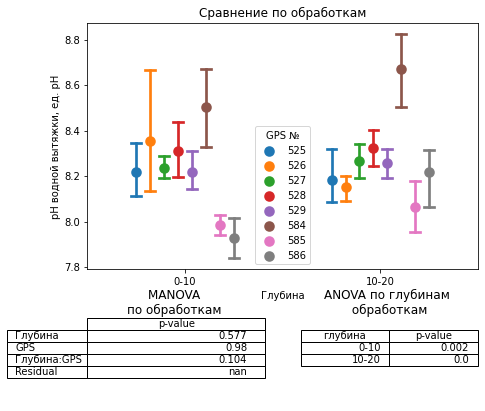

In [8]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/pH_вод_рельеф.jpg')


## Фосфор (подвижная форма), мг/кг
### По обработкам

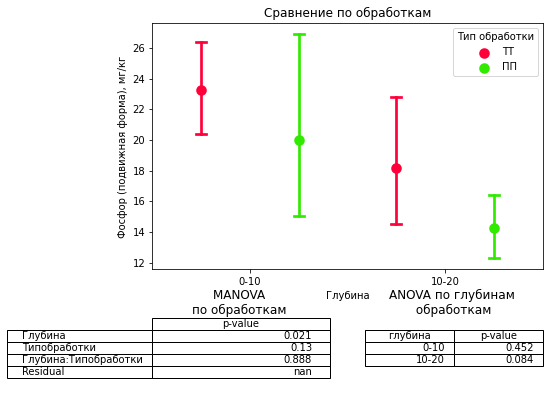

In [16]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/фосфор_обработки.jpg')


In [17]:
stats

Фосфор (подвижная форма), мг/кг                     
                                                 mean variation        std
Тип обработки Глубина                                                     
ПП            0-10                          19.982789  0.860647  17.464783
              10-20                         14.267293  0.425185   6.160291
ТТ            0-10                          23.233092  0.271366   6.487447
              10-20                         18.185711  0.548862  10.227940

### По формам рельефа

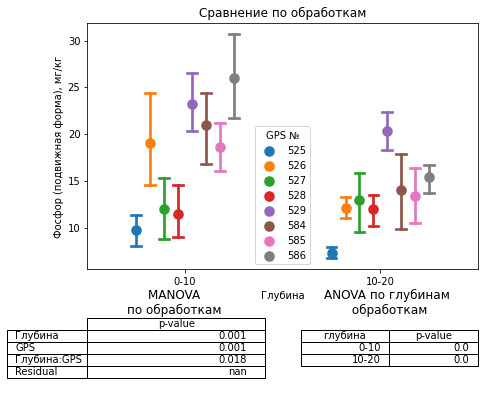

In [10]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/фосфор_рельеф.jpg')


## Калий (подвижная форма), млн-1
### По обработкам

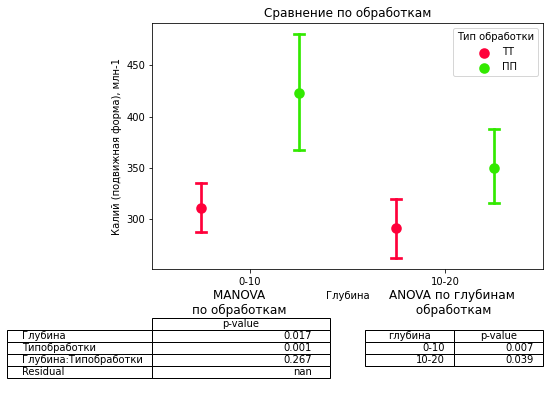

In [18]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/калий_обработки.jpg')


In [19]:
stats

Калий (подвижная форма), млн-1                      
                                                mean variation         std
Тип обработки Глубина                                                     
ПП            0-10                        422.846028  0.383640  164.735828
              10-20                       349.779999  0.315694  112.135714
ТТ            0-10                        311.092648  0.165167   52.871964
              10-20                       291.527019  0.238275   71.178987

### По формам рельефа

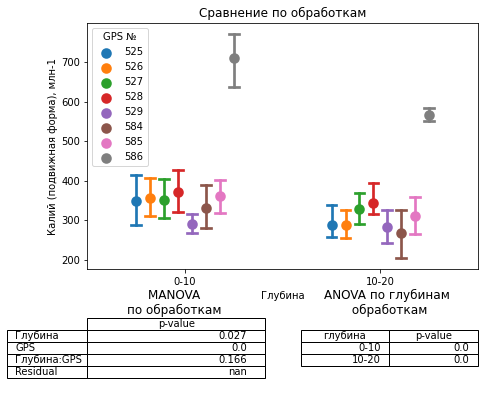

In [12]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/калий_рельеф.jpg')


## Общий азот, %
### По обработкам

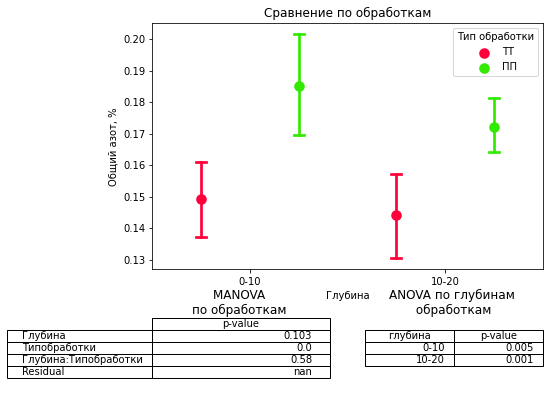

In [20]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/азот_обработки.jpg')


In [21]:
stats

Общий азот, %                    
                               mean variation       std
Тип обработки Глубина                                  
ПП            0-10         0.185152  0.254762  0.047901
              10-20        0.172121  0.146392  0.025588
ТТ            0-10         0.149444  0.172011  0.026451
              10-20        0.144286  0.202426  0.029928

### По формам рельефа

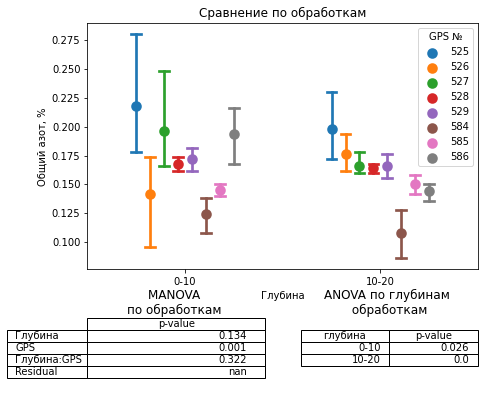

In [14]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 1)
stats

fig.savefig('рисунки/агрохимия/азот_рельеф.jpg')


## Органический углерод, %
### По обработкам

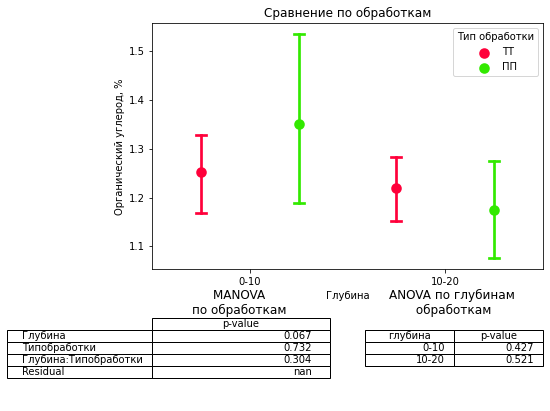

In [22]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/углерод_обработки.jpg')


In [23]:
stats

Органический углерод, %                    
                                         mean variation       std
Тип обработки Глубина                                            
ПП            0-10                   1.350852  0.369577  0.506985
              10-20                  1.173987  0.240996  0.287312
ТТ            0-10                   1.251465  0.139736  0.179945
              10-20                  1.218601  0.132179  0.165052

### По формам рельефа

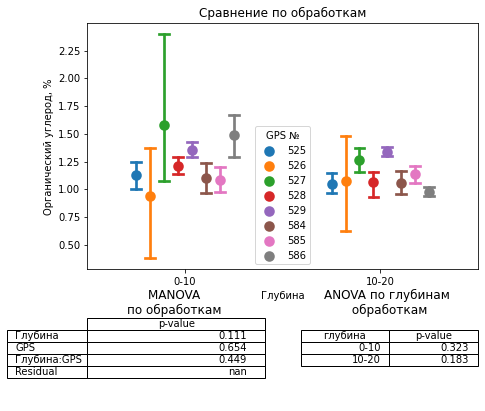

In [16]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/углерод_рельеф.jpg')
